In [1]:
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
file="/Users/irffanalahi/Research/weekly/for_8_20_20/rr_summary/almost_finalv4_smdiag_mixdiag.txt"
df=pd.read_csv(file,sep="\t",index_col=0)
trans=True
df.head()


,ThisStudy PBMC WGBS,Reinius WB 450k,Reinius PBMC 450k,Accomando WB 450k,cfDNA CRC WGBS,ThisStudy Tumor WGBS,Reinius PurifiedSubset 450k,Blueprint PurifiedSubset WGBS,ThisStudy PurifiedSubset WGBS
Signature Matrix,,,,,,,,,
Blueprint WGBS No,0.862831,0.760588,0.677354,0.516287,0.520217,0.192052,0.922688,NaN,0.912451
Reinius 450k No,-0.013125,0.863194,0.830505,0.808180,0.458555,0.099534,NaN,0.986290,0.962972
Candace 450k No,0.552000,0.499860,0.391693,0.678317,0.374980,0.368745,NaN,0.942102,0.926170
Blueprint WGBS NA,0.947643,0.029926,0.348891,0.065702,0.524568,0.221370,0.918633,NaN,0.921020
Reinius 450k NA,0.846344,0.038582,0.618188,0.126240,0.494284,0.136199,NaN,0.989871,0.966211


In [3]:
def textprocessing(sroftext):
    d1 = [x.split() for x in sroftext.tolist()]
    
    print(d1)
    for irfindex in range(len(d1)):
        if "ThisStudy" in d1[irfindex]:
            d1[irfindex][d1[irfindex].index("ThisStudy")]="This Study"
        if "PurifiedSubset" in d1[irfindex]:
            d1[irfindex][d1[irfindex].index("PurifiedSubset")]="Purified Subset"
            
            
    

                          
    print(d1)
    
    
    
    d2 = [max(len(y) for y in x) for x in list(map(list, zip(*d1)))]
    
    #print(d2)
    
    #d3 = [' '.join([y.rjust(d2[z], ' ') for z, y in enumerate(x)]) for x in d1]
    d3 = [' '.join([y.center(d2[z], ' ') for z, y in enumerate(x)]) for x in d1]
    
    print(d3)
    return d3

In [4]:
if trans==True:
    df=df.T
    
    #df.to_csv(file+"_trans.txt",sep="\t")

[['Blueprint', 'WGBS', 'No'], ['Reinius', '450k', 'No'], ['Candace', '450k', 'No'], ['Blueprint', 'WGBS', 'NA'], ['Reinius', '450k', 'NA'], ['ThisStudy', 'WGBS', 'NA']]
[['Blueprint', 'WGBS', 'No'], ['Reinius', '450k', 'No'], ['Candace', '450k', 'No'], ['Blueprint', 'WGBS', 'NA'], ['Reinius', '450k', 'NA'], ['This Study', 'WGBS', 'NA']]
['Blueprint  WGBS No', ' Reinius   450k No', ' Candace   450k No', 'Blueprint  WGBS NA', ' Reinius   450k NA', 'This Study WGBS NA']
[['ThisStudy', 'PBMC', 'WGBS'], ['Reinius', 'WB', '450k'], ['Reinius', 'PBMC', '450k'], ['Accomando', 'WB', '450k'], ['cfDNA', 'CRC', 'WGBS'], ['ThisStudy', 'Tumor', 'WGBS'], ['Reinius', 'PurifiedSubset', '450k'], ['Blueprint', 'PurifiedSubset', 'WGBS'], ['ThisStudy', 'PurifiedSubset', 'WGBS']]
[['This Study', 'PBMC', 'WGBS'], ['Reinius', 'WB', '450k'], ['Reinius', 'PBMC', '450k'], ['Accomando', 'WB', '450k'], ['cfDNA', 'CRC', 'WGBS'], ['This Study', 'Tumor', 'WGBS'], ['Reinius', 'Purified Subset', '450k'], ['Blueprint', '

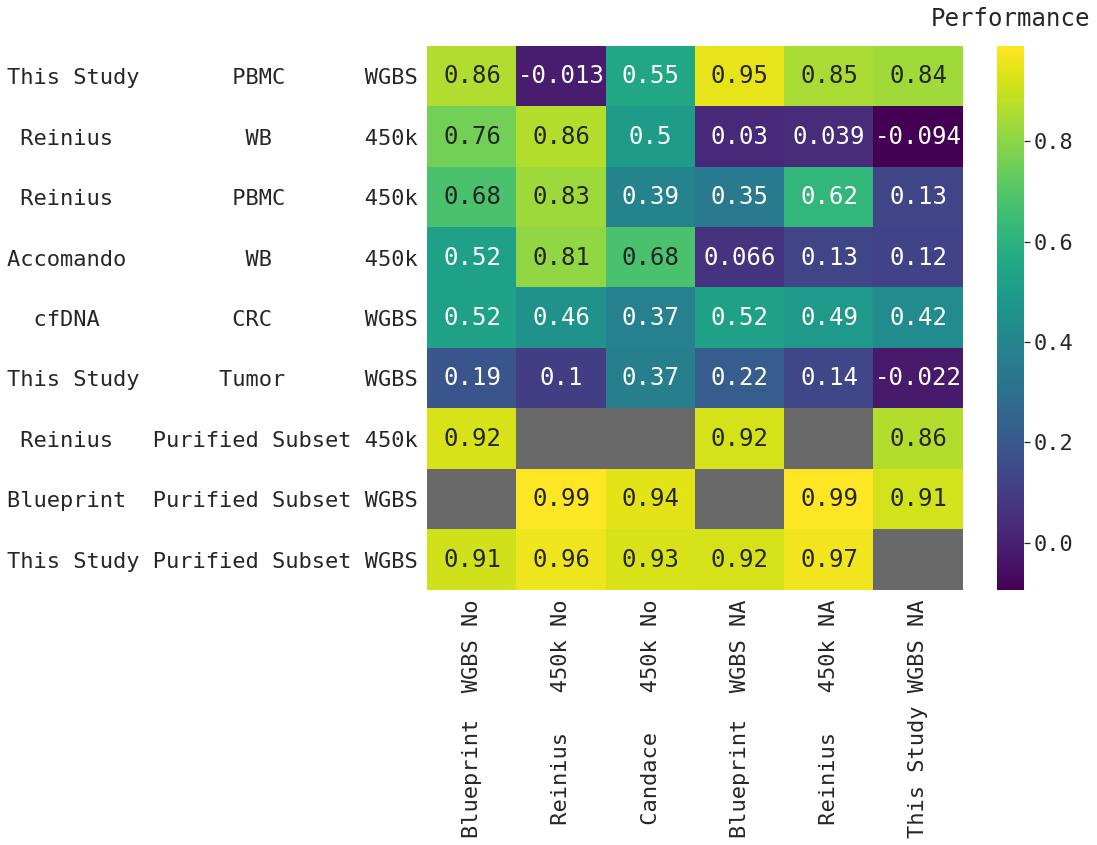

In [5]:
#ax=sns.heatmap(df, annot=True, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
#plt.pcolor(df)
sns.set(font_scale=2,font='monospace')
mycmap = plt.cm.viridis

mycmap.set_bad("dimgrey")

plt.figure(figsize=(12,10))

#plt.rcParams['font.family']='sans-serif'
#plt.rcParams['font.sans-serif'] = ['Arial']






aaa=sns.heatmap(df, annot=True,cmap=mycmap,xticklabels=textprocessing(df.columns.values), yticklabels=textprocessing(df.index.values))
aaa.set_xticklabels(aaa.get_xticklabels(), rotation=90)
aaa.set_yticklabels(aaa.get_yticklabels(), rotation=0)


############# colrbar title #########
cbar = aaa.collections[0].colorbar#.set_label('# of contacts', horizontalalignment='left')
cbar.ax.set_title('Performance',pad=20)
############# colrbar title #########



#########

#aaa.text(-.75,0,"safs     dff   ddd",fontweight='bold')

#########




#plt.ylabel("Mixture")
plt.xlabel("")


heatname=file+"_heat"+".pdf"
plt.savefig(heatname,bbox_inches = "tight")
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

<Figure size 864x720 with 0 Axes>

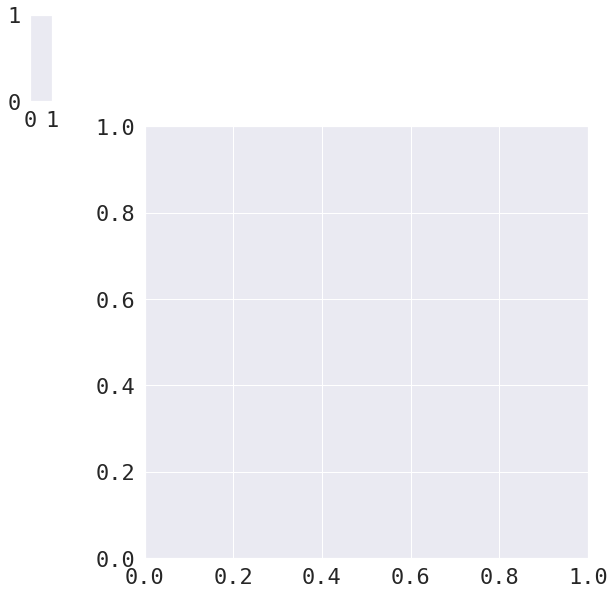

In [6]:
plt.figure(figsize=(12,10))
cg=sns.clustermap(df, annot=True,cmap="viridis")
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
clustername=file+"_heat_clustered"+".pdf"
plt.savefig(clustername,bbox_inches = "tight")
plt.show()